In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [23]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_period','koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_slogg','koi_kepmag', 'koi_impact', 'dec','koi_tce_plnt_num']]
selected_features.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_slogg,koi_kepmag,koi_impact,dec,koi_tce_plnt_num
0,CONFIRMED,0,0,0,0,54.418383,4.50700,874.8,2.83,443,9.11,4.467,15.347,0.586,48.141651,2
1,FALSE POSITIVE,0,1,0,0,19.899140,1.78220,10829.0,14.60,638,39.30,4.544,15.436,0.969,48.134129,1
2,FALSE POSITIVE,0,1,0,0,1.736952,2.40641,8079.2,33.46,1395,891.96,4.564,15.597,1.276,48.285210,1
3,CONFIRMED,0,0,0,0,2.525592,1.65450,603.3,2.75,1406,926.16,4.438,15.509,0.701,48.226200,1
4,CONFIRMED,0,0,0,0,4.134435,3.14020,686.0,2.77,1160,427.65,4.486,15.714,0.762,48.224670,2


# Create a Train Test Split

Use `koi_disposition` for the y values

In [24]:
y = selected_features['koi_disposition']
X = selected_features[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_period','koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_slogg','koi_kepmag', 'koi_impact', 'dec','koi_tce_plnt_num']]
print(X.shape, y.shape)

(6991, 15) (6991,)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale Data and Set up K-Nearest Model

Scale the data using the MinMaxScaler

In [26]:
# Scale and transform your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.763
k: 3, Train/Test Score: 0.880/0.783
k: 5, Train/Test Score: 0.854/0.794
k: 7, Train/Test Score: 0.848/0.781
k: 9, Train/Test Score: 0.837/0.784
k: 11, Train/Test Score: 0.832/0.784
k: 13, Train/Test Score: 0.825/0.782
k: 15, Train/Test Score: 0.822/0.784
k: 17, Train/Test Score: 0.822/0.783
k: 19, Train/Test Score: 0.822/0.781


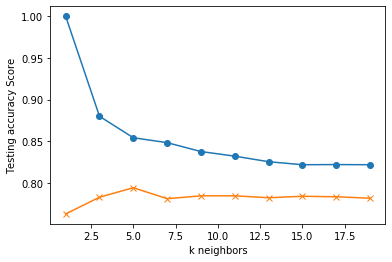

In [27]:
# Set up K-Nearest Model
# Loop through k values to determine which has the highest accuracy

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [28]:
##### Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

# Choice of k here could depend on a few things:
# - best test performance
# - balance of complexity vs run-time (higher k is more complex model, and takes longer to run)
# - closest performance between train and test

k=5 Test Acc: 0.794


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [29]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [30]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [31]:
# Train the model with GridSearch
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.808, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.799, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.785, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.786, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.816, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.808, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.799, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.785, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.786, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.816, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [32]:
# Determine best parameter and best score
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.803358523930461


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Decision_Tree.sav'
joblib.dump(your_model, filename)